In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sn

# Import data.
CO2_df = pd.read_csv('World_CO2_data.csv')
CO2_df

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,47.5,3385.574,1.889
25187,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,NaN,NaN,NaN
25188,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,NaN,NaN,NaN
25189,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN


In [2]:
CO2_df.dtypes

iso_code                                object
country                                 object
year                                     int64
co2                                    float64
co2_per_capita                         float64
trade_co2                              float64
cement_co2                             float64
cement_co2_per_capita                  float64
coal_co2                               float64
coal_co2_per_capita                    float64
flaring_co2                            float64
flaring_co2_per_capita                 float64
gas_co2                                float64
gas_co2_per_capita                     float64
oil_co2                                float64
oil_co2_per_capita                     float64
other_industry_co2                     float64
other_co2_per_capita                   float64
co2_growth_prct                        float64
co2_growth_abs                         float64
co2_per_gdp                            float64
co2_per_unit_

In [3]:
# Drop columns that have more than 90% NaN values.
CO2_df.dropna(thresh=len(CO2_df)*0.9, axis='columns')
# CO2_df = CO_df.reset_index()

,country,year,co2,co2_per_capita,co2_growth_prct,co2_growth_abs,cumulative_co2,share_global_co2,share_global_cumulative_co2,population
0,Afghanistan,1949,0.015,0.002,NaN,NaN,0.015,0.00,0.00,7624058.0
1,Afghanistan,1950,0.084,0.011,475.00,0.070,0.099,0.00,0.00,7752117.0
2,Afghanistan,1951,0.092,0.012,8.70,0.007,0.191,0.00,0.00,7840151.0
3,Afghanistan,1952,0.092,0.012,0.00,0.000,0.282,0.00,0.00,7935996.0
4,Afghanistan,1953,0.106,0.013,16.00,0.015,0.388,0.00,0.00,8039684.0
...,...,...,...,...,...,...,...,...,...,...
25186,Zimbabwe,2016,10.738,0.765,-12.17,-1.488,736.467,0.03,0.05,14030338.0
25187,Zimbabwe,2017,9.582,0.673,-10.77,-1.156,746.049,0.03,0.05,14236599.0
25188,Zimbabwe,2018,11.854,0.821,23.72,2.273,757.903,0.03,0.05,14438812.0
25189,Zimbabwe,2019,10.949,0.748,-7.64,-0.905,768.852,0.03,0.05,14645473.0


In [4]:
usa_df = CO2_df[CO2_df['country'].isin(['United States'])]
usa_df

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
23834,USA,United States,1800,0.253,0.042,NaN,NaN,NaN,0.253,0.042,...,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN
23835,USA,United States,1801,0.267,0.044,NaN,NaN,NaN,0.267,0.044,...,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN,NaN,NaN
23836,USA,United States,1802,0.289,0.046,NaN,NaN,NaN,0.289,0.046,...,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN,NaN,NaN
23837,USA,United States,1803,0.297,0.047,NaN,NaN,NaN,0.297,0.047,...,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN,NaN,NaN
23838,USA,United States,1804,0.333,0.052,NaN,NaN,NaN,0.333,0.052,...,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,USA,United States,2016,5248.024,16.247,328.696,39.439,0.122,1379.744,4.271,...,18.288,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,25560.520,79130.818,1.486
24051,USA,United States,2017,5207.751,16.020,343.021,40.324,0.124,1338.667,4.118,...,17.973,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,25647.389,78894.410,NaN
24052,USA,United States,2018,5375.491,16.434,351.120,38.971,0.119,1283.532,3.924,...,18.415,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,26556.388,81188.359,NaN
24053,USA,United States,2019,5255.816,15.972,369.967,40.896,0.124,1098.854,3.339,...,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,26291.355,79897.151,NaN


In [5]:
# Drop nonessential ID columns.
usa_df = usa_df.drop(columns=["iso_code"], axis=1)
usa_df

,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
23834,United States,1800,0.253,0.042,NaN,NaN,NaN,0.253,0.042,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN
23835,United States,1801,0.267,0.044,NaN,NaN,NaN,0.267,0.044,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN,NaN,NaN
23836,United States,1802,0.289,0.046,NaN,NaN,NaN,0.289,0.046,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN,NaN,NaN
23837,United States,1803,0.297,0.047,NaN,NaN,NaN,0.297,0.047,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN,NaN,NaN
23838,United States,1804,0.333,0.052,NaN,NaN,NaN,0.333,0.052,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,United States,2016,5248.024,16.247,328.696,39.439,0.122,1379.744,4.271,51.908,...,18.288,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,25560.520,79130.818,1.486
24051,United States,2017,5207.751,16.020,343.021,40.324,0.124,1338.667,4.118,56.186,...,17.973,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,25647.389,78894.410,NaN
24052,United States,2018,5375.491,16.434,351.120,38.971,0.119,1283.532,3.924,71.008,...,18.415,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,26556.388,81188.359,NaN
24053,United States,2019,5255.816,15.972,369.967,40.896,0.124,1098.854,3.339,84.510,...,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,26291.355,79897.151,NaN


In [6]:
# Drop columns that have more than 90% NaN Values.
usa_df.dropna(thresh=len(usa_df)*0.9, axis='columns')

,country,year,co2,co2_per_capita,coal_co2,coal_co2_per_capita,co2_growth_prct,co2_growth_abs,co2_per_gdp,cumulative_co2,cumulative_coal_co2,share_global_co2,share_global_coal_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,population,gdp
23834,United States,1800,0.253,0.042,0.253,0.042,NaN,NaN,NaN,0.253,0.253,0.90,0.90,0.03,0.03,6000000.0,NaN
23835,United States,1801,0.267,0.044,0.267,0.044,5.80,0.015,NaN,0.520,0.520,0.96,0.96,0.06,0.06,6113782.0,NaN
23836,United States,1802,0.289,0.046,0.289,0.046,8.22,0.022,NaN,0.810,0.810,0.79,0.79,0.10,0.10,6229723.0,NaN
23837,United States,1803,0.297,0.047,0.297,0.047,2.53,0.007,NaN,1.107,1.107,0.94,0.94,0.13,0.13,6347862.0,NaN
23838,United States,1804,0.333,0.052,0.333,0.052,12.35,0.037,NaN,1.440,1.440,0.97,0.97,0.16,0.16,6468241.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,United States,2016,5248.024,16.247,1379.744,4.271,-2.30,-123.747,0.306,396171.260,171040.485,14.80,9.61,25.52,23.41,323015992.0,1.716256e+13
24051,United States,2017,5207.751,16.020,1338.667,4.118,-0.77,-40.273,0.296,401379.012,172379.152,14.50,9.26,25.27,23.14,325084758.0,1.759628e+13
24052,United States,2018,5375.491,16.434,1283.532,3.924,3.22,167.739,0.296,406754.502,173662.684,14.67,8.72,25.03,22.86,327096263.0,1.814065e+13
24053,United States,2019,5255.816,15.972,1098.854,3.339,-2.23,-119.674,NaN,412010.318,174761.538,14.32,7.54,24.79,22.57,329064917.0,NaN


In [7]:
# Generate categorical variable list.
usa_cat = usa_df.dtypes[usa_df.dtypes == "float64"].index.tolist()

# Check number of unique values in each column.
usa_df[usa_cat].nunique()

co2                                    220
co2_per_capita                         216
trade_co2                               30
cement_co2                             108
cement_co2_per_capita                   57
coal_co2                               220
coal_co2_per_capita                    215
flaring_co2                             70
flaring_co2_per_capita                  57
gas_co2                                138
gas_co2_per_capita                     138
oil_co2                                161
oil_co2_per_capita                     157
other_industry_co2                      94
other_co2_per_capita                    64
co2_growth_prct                        214
co2_growth_abs                         208
co2_per_gdp                            184
co2_per_unit_energy                     20
consumption_co2                         30
consumption_co2_per_capita              30
consumption_co2_per_gdp                 27
cumulative_co2                         221
cumulative_

In [8]:
# Drop the nonessential ID columns, 'EIN' and 'NAME'.
usa_df = usa_df.drop(columns=["share_global_co2",
                              "share_global_cement_co2",
                              "share_global_coal_co2",
                              "share_global_flaring_co2",              
                              "share_global_gas_co2",                   
                              "share_global_oil_co2",                 
                              "share_global_other_co2",                  
                              "share_global_cumulative_co2",          
                              "share_global_cumulative_cement_co2",    
                              "share_global_cumulative_coal_co2",       
                              "share_global_cumulative_flaring_co2",     
                              "share_global_cumulative_gas_co2",        
                              "share_global_cumulative_oil_co2",        
                              "share_global_cumulative_other_co2",      
                              "total_ghg",
                              'ghg_excluding_lucf_per_capita',
                              "ghg_per_capita",
                              "cumulative_other_co2",
                              "consumption_co2",
                              "consumption_co2_per_capita",
                              "consumption_co2_per_gdp",
                              "cumulative_co2",
                              "cumulative_cement_co2",
                              "consumption_co2_per_capita",
                              "consumption_co2_per_gdp",
                              "cumulative_co2",
                              "cumulative_cement_co2",
                              "cumulative_coal_co2",
                              "cumulative_flaring_co2",
                              "cumulative_gas_co2",
                              "cumulative_oil_co2",
                              "cumulative_other_co2",
                              "trade_co2_share",
                              "other_industry_co2",
                              "other_co2_per_capita",
                              "co2_growth_abs",
                              "co2_per_unit_energy",
                              "total_ghg_excluding_lucf",
                              "trade_co2",
                              "flaring_co2_per_capita",
                              "primary_energy_consumption",
                              "energy_per_capita",

                              ], axis=1)
usa_df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,oil_co2_per_capita,co2_growth_prct,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp
23834,United States,1800,0.253,0.042,NaN,NaN,0.253,0.042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN
23835,United States,1801,0.267,0.044,NaN,NaN,0.267,0.044,NaN,NaN,...,NaN,5.80,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN
23836,United States,1802,0.289,0.046,NaN,NaN,0.289,0.046,NaN,NaN,...,NaN,8.22,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN
23837,United States,1803,0.297,0.047,NaN,NaN,0.297,0.047,NaN,NaN,...,NaN,2.53,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN
23838,United States,1804,0.333,0.052,NaN,NaN,0.333,0.052,NaN,NaN,...,NaN,12.35,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,United States,2016,5248.024,16.247,39.439,0.122,1379.744,4.271,51.908,1502.475,...,6.955,-2.30,0.306,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,1.486
24051,United States,2017,5207.751,16.020,40.324,0.124,1338.667,4.118,56.186,1480.059,...,6.968,-0.77,0.296,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,NaN
24052,United States,2018,5375.491,16.434,38.971,0.119,1283.532,3.924,71.008,1641.041,...,7.083,3.22,0.296,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,NaN
24053,United States,2019,5255.816,15.972,40.896,0.124,1098.854,3.339,84.510,1694.894,...,7.030,-2.23,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,NaN


In [9]:
usa_df.nunique()

country                       1
year                        221
co2                         220
co2_per_capita              216
cement_co2                  108
cement_co2_per_capita        57
coal_co2                    220
coal_co2_per_capita         215
flaring_co2                  70
gas_co2                     138
gas_co2_per_capita          138
oil_co2                     161
oil_co2_per_capita          157
co2_growth_prct             214
co2_per_gdp                 184
methane                      29
methane_per_capita           29
nitrous_oxide                29
nitrous_oxide_per_capita     28
population                  221
gdp                         199
energy_per_gdp               51
dtype: int64

In [10]:
# Identify null values on per column basis.
for column in usa_df.columns:
    print(f"column {column} has {usa_df[column].isnull().sum()} null values")

column country has 0 null values
column year has 0 null values
column co2 has 0 null values
column co2_per_capita has 0 null values
column cement_co2 has 80 null values
column cement_co2_per_capita has 80 null values
column coal_co2 has 0 null values
column coal_co2_per_capita has 0 null values
column flaring_co2 has 150 null values
column gas_co2 has 82 null values
column gas_co2_per_capita has 82 null values
column oil_co2 has 60 null values
column oil_co2_per_capita has 60 null values
column co2_growth_prct has 1 null values
column co2_per_gdp has 22 null values
column methane has 192 null values
column methane_per_capita has 192 null values
column nitrous_oxide has 192 null values
column nitrous_oxide_per_capita has 192 null values
column population has 0 null values
column gdp has 22 null values
column energy_per_gdp has 169 null values


In [11]:
usa_df = usa_df.reset_index()
usa_df

,index,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,...,oil_co2_per_capita,co2_growth_prct,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp
0,23834,United States,1800,0.253,0.042,NaN,NaN,0.253,0.042,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN
1,23835,United States,1801,0.267,0.044,NaN,NaN,0.267,0.044,NaN,...,NaN,5.80,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN
2,23836,United States,1802,0.289,0.046,NaN,NaN,0.289,0.046,NaN,...,NaN,8.22,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN
3,23837,United States,1803,0.297,0.047,NaN,NaN,0.297,0.047,NaN,...,NaN,2.53,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN
4,23838,United States,1804,0.333,0.052,NaN,NaN,0.333,0.052,NaN,...,NaN,12.35,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,24050,United States,2016,5248.024,16.247,39.439,0.122,1379.744,4.271,51.908,...,6.955,-2.30,0.306,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,1.486
217,24051,United States,2017,5207.751,16.020,40.324,0.124,1338.667,4.118,56.186,...,6.968,-0.77,0.296,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,NaN
218,24052,United States,2018,5375.491,16.434,38.971,0.119,1283.532,3.924,71.008,...,7.083,3.22,0.296,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,NaN
219,24053,United States,2019,5255.816,15.972,40.896,0.124,1098.854,3.339,84.510,...,7.030,-2.23,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,NaN


In [12]:
usa_df.nunique()

index                       221
country                       1
year                        221
co2                         220
co2_per_capita              216
cement_co2                  108
cement_co2_per_capita        57
coal_co2                    220
coal_co2_per_capita         215
flaring_co2                  70
gas_co2                     138
gas_co2_per_capita          138
oil_co2                     161
oil_co2_per_capita          157
co2_growth_prct             214
co2_per_gdp                 184
methane                      29
methane_per_capita           29
nitrous_oxide                29
nitrous_oxide_per_capita     28
population                  221
gdp                         199
energy_per_gdp               51
dtype: int64

In [13]:
# Drop the nonessential ID columns.
usa_df = usa_df.drop(columns=["index"], axis=1)
usa_df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,oil_co2_per_capita,co2_growth_prct,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp
0,United States,1800,0.253,0.042,NaN,NaN,0.253,0.042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN
1,United States,1801,0.267,0.044,NaN,NaN,0.267,0.044,NaN,NaN,...,NaN,5.80,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN
2,United States,1802,0.289,0.046,NaN,NaN,0.289,0.046,NaN,NaN,...,NaN,8.22,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN
3,United States,1803,0.297,0.047,NaN,NaN,0.297,0.047,NaN,NaN,...,NaN,2.53,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN
4,United States,1804,0.333,0.052,NaN,NaN,0.333,0.052,NaN,NaN,...,NaN,12.35,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,United States,2016,5248.024,16.247,39.439,0.122,1379.744,4.271,51.908,1502.475,...,6.955,-2.30,0.306,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,1.486
217,United States,2017,5207.751,16.020,40.324,0.124,1338.667,4.118,56.186,1480.059,...,6.968,-0.77,0.296,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,NaN
218,United States,2018,5375.491,16.434,38.971,0.119,1283.532,3.924,71.008,1641.041,...,7.083,3.22,0.296,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,NaN
219,United States,2019,5255.816,15.972,40.896,0.124,1098.854,3.339,84.510,1694.894,...,7.030,-2.23,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,NaN


In [14]:
# Save cleaned data.
file_path = "Updated_USA-co2-data.csv"
usa_df.to_csv(file_path, index=False)

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Load data.
file_path = "USA_CO2_Data.csv"
predict_temp_df = pd.read_csv(file_path)
predict_temp_df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,0.253,0.042,NaN,NaN,0.253,0.042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000,NaN,NaN,12.377868,3.205628
1,United States,1801,0.267,0.044,NaN,NaN,0.267,0.044,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782,NaN,NaN,12.681863,2.895417
2,United States,1802,0.289,0.046,NaN,NaN,0.289,0.046,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723,NaN,NaN,12.859703,3.065703
3,United States,1803,0.297,0.047,NaN,NaN,0.297,0.047,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862,NaN,NaN,12.692603,3.065032
4,United States,1804,0.333,0.052,NaN,NaN,0.333,0.052,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241,NaN,NaN,12.576432,3.379515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,5478.210,17.885,29.615,0.097,1905.943,6.222,39.071,1245.742,...,0.368,649.89,2.122,241.81,0.789,306307565,1.489429e+13,1.676,11.156327,0.220114
210,United States,2010,5675.786,18.368,31.449,0.102,2013.304,6.515,41.343,1308.832,...,0.372,650.38,2.105,247.17,0.800,309011469,1.527062e+13,1.688,11.732877,0.211351
211,United States,2011,5540.173,17.781,32.208,0.103,1903.555,6.109,45.542,1327.528,...,0.357,628.73,2.018,255.55,0.820,311584051,1.550930e+13,1.650,11.811093,0.232825
212,United States,2012,5338.698,17.000,35.270,0.112,1684.037,5.362,48.883,1388.255,...,0.337,618.71,1.970,246.42,0.785,314043885,1.584964e+13,1.567,12.761842,0.269340


## Data Preprocessing

In [17]:
# Remove NaN values by replacing NaN values with mean average. 
predict_temp_df['flaring_co2'].fillna(predict_temp_df['flaring_co2'].mean(), inplace = True)
predict_temp_df['cement_co2'].fillna(predict_temp_df['cement_co2'].mean(), inplace = True)
predict_temp_df['cement_co2_per_capita'].fillna(predict_temp_df['cement_co2_per_capita'].mean(), inplace = True)
predict_temp_df['gas_co2'].fillna(predict_temp_df['gas_co2'].mean(), inplace = True)
predict_temp_df['gas_co2_per_capita'].fillna(predict_temp_df['gas_co2_per_capita'].mean(), inplace = True)
predict_temp_df['oil_co2'].fillna(predict_temp_df['oil_co2'].mean(), inplace = True)
predict_temp_df['oil_co2_per_capita'].fillna(predict_temp_df['oil_co2_per_capita'].mean(), inplace = True)
predict_temp_df['co2_per_gdp'].fillna(predict_temp_df['co2_per_gdp'].mean(), inplace = True)
predict_temp_df['methane'].fillna(predict_temp_df['methane'].mean(), inplace = True)
predict_temp_df['methane_per_capita'].fillna(predict_temp_df['methane_per_capita'].mean(), inplace = True)
predict_temp_df['nitrous_oxide'].fillna(predict_temp_df['nitrous_oxide'].mean(), inplace = True)
predict_temp_df['nitrous_oxide_per_capita'].fillna(predict_temp_df['nitrous_oxide_per_capita'].mean(), inplace = True)
predict_temp_df['gdp'].fillna(predict_temp_df['gdp'].mean(), inplace = True)
predict_temp_df['energy_per_gdp'].fillna(predict_temp_df['energy_per_gdp'].mean(), inplace = True)
predict_temp_df['co2_growth_prct'].fillna(predict_temp_df['co2_growth_prct'].mean(), inplace = True)

predict_temp_df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,0.253,0.042,18.398612,0.085731,0.253,0.042,27.881062,497.198833,...,0.718742,688.9625,2.4435,259.413333,0.916625,6000000,3.055051e+12,2.602592,12.377868,3.205628
1,United States,1801,0.267,0.044,18.398612,0.085731,0.267,0.044,27.881062,497.198833,...,0.718742,688.9625,2.4435,259.413333,0.916625,6113782,3.055051e+12,2.602592,12.681863,2.895417
2,United States,1802,0.289,0.046,18.398612,0.085731,0.289,0.046,27.881062,497.198833,...,0.718742,688.9625,2.4435,259.413333,0.916625,6229723,3.055051e+12,2.602592,12.859703,3.065703
3,United States,1803,0.297,0.047,18.398612,0.085731,0.297,0.047,27.881062,497.198833,...,0.718742,688.9625,2.4435,259.413333,0.916625,6347862,3.055051e+12,2.602592,12.692603,3.065032
4,United States,1804,0.333,0.052,18.398612,0.085731,0.333,0.052,27.881062,497.198833,...,0.718742,688.9625,2.4435,259.413333,0.916625,6468241,3.055051e+12,2.602592,12.576432,3.379515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,5478.210,17.885,29.615000,0.097000,1905.943,6.222,39.071000,1245.742000,...,0.368000,649.8900,2.1220,241.810000,0.789000,306307565,1.489429e+13,1.676000,11.156327,0.220114
210,United States,2010,5675.786,18.368,31.449000,0.102000,2013.304,6.515,41.343000,1308.832000,...,0.372000,650.3800,2.1050,247.170000,0.800000,309011469,1.527062e+13,1.688000,11.732877,0.211351
211,United States,2011,5540.173,17.781,32.208000,0.103000,1903.555,6.109,45.542000,1327.528000,...,0.357000,628.7300,2.0180,255.550000,0.820000,311584051,1.550930e+13,1.650000,11.811093,0.232825
212,United States,2012,5338.698,17.000,35.270000,0.112000,1684.037,5.362,48.883000,1388.255000,...,0.337000,618.7100,1.9700,246.420000,0.785000,314043885,1.584964e+13,1.567000,12.761842,0.269340


In [18]:
predict_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      214 non-null    object 
 1   year                         214 non-null    int64  
 2   co2                          214 non-null    float64
 3   co2_per_capita               214 non-null    float64
 4   cement_co2                   214 non-null    float64
 5   cement_co2_per_capita        214 non-null    float64
 6   coal_co2                     214 non-null    float64
 7   coal_co2_per_capita          214 non-null    float64
 8   flaring_co2                  214 non-null    float64
 9   gas_co2                      214 non-null    float64
 10  gas_co2_per_capita           214 non-null    float64
 11  oil_co2                      214 non-null    float64
 12  oil_co2_per_capita           214 non-null    float64
 13  co2_growth_prct     

In [19]:
# Print columns in DataFrame.
predict_temp_df.columns

Index(['country', 'year', 'co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp', 'Avg Temperature',
       'Avg Temperature Uncertainty'],
      dtype='object')

In [20]:
# Create features.
X = predict_temp_df.drop(columns = "Avg Temperature")
X = pd.get_dummies(X, columns = ["country"])

# Create target.
y = predict_temp_df['Avg Temperature'].astype('int').to_frame()

In [21]:
X.describe()

,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,gas_co2_per_capita,...,co2_growth_prct,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature Uncertainty
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,...,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,2.140000e+02,2.140000e+02,214.000000,214.000000
mean,1906.500000,1775.834846,9.659154,18.398612,0.085731,777.669472,5.111668,27.881062,497.198833,2.186538,...,5.113803,0.718742,688.962500,2.443500,259.413333,0.916625,1.119351e+08,3.055051e+12,2.602592,1.052999
std,61.920648,2020.307607,7.936626,12.609423,0.052663,713.472753,3.865967,8.113161,387.022883,1.459075,...,8.132988,0.410101,16.864325,0.117713,3.319460,0.028872,9.337697e+07,4.122802e+12,0.337572,1.088695
min,1800.000000,0.253000,0.042000,0.000000,0.000000,0.253000,0.042000,4.990000,0.165000,0.003000,...,-18.100000,0.029000,618.710000,1.956000,241.810000,0.782000,6.000000e+06,2.668967e+10,1.567000,0.169596
25%,1853.250000,30.911250,1.185250,10.409500,0.076500,30.911250,1.185250,27.881062,99.791250,0.769000,...,0.787500,0.399500,688.962500,2.443500,259.413333,0.916625,2.607410e+07,2.198610e+11,2.602592,0.230978
50%,1906.500000,1044.142000,10.775000,18.398612,0.085731,887.893500,5.586500,27.881062,497.198833,2.186538,...,4.635000,0.718742,688.962500,2.443500,259.413333,0.916625,8.967570e+07,1.237754e+12,2.602592,0.389550
75%,1959.750000,2879.977000,16.341000,28.458000,0.130500,1312.315750,7.463000,27.881062,620.821250,3.324750,...,9.597500,0.993250,688.962500,2.443500,259.413333,0.916625,1.859870e+08,3.242571e+12,2.602592,1.691417
max,2013.000000,6134.521000,22.236000,46.851000,0.171000,2214.838000,14.344000,54.647000,1427.506000,5.231000,...,33.500000,1.648000,770.750000,3.044000,281.250000,1.048000,3.164005e+08,1.610843e+13,3.746000,3.706145


## Visualizing the temperature data

<Axes: xlabel='population', ylabel='Avg Temperature'>

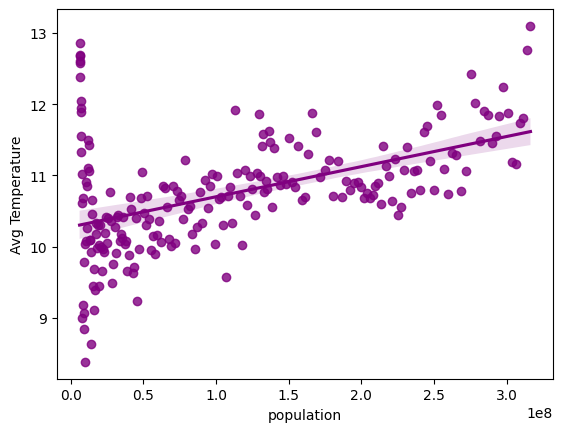

In [22]:
# Scatter plot between Population and Avg Temperature.
sns.regplot(x = 'population', y = 'Avg Temperature', color = "purple", data = predict_temp_df)

<Axes: xlabel='co2', ylabel='Avg Temperature'>

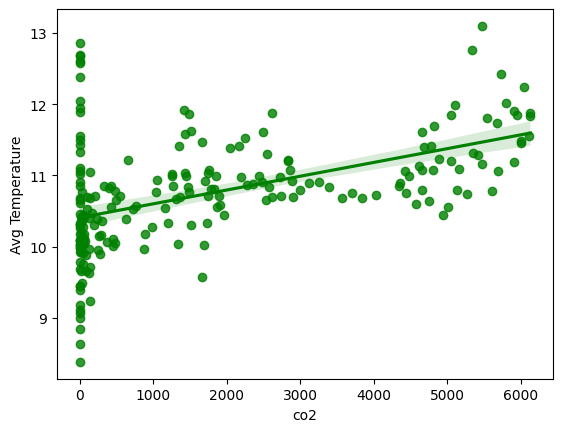

In [23]:
# Scatter plot between CO2 and Avg Temperature.
sns.regplot(x = 'co2', y = 'Avg Temperature', color = "green", data = predict_temp_df)

<Axes: xlabel='gdp', ylabel='Avg Temperature'>

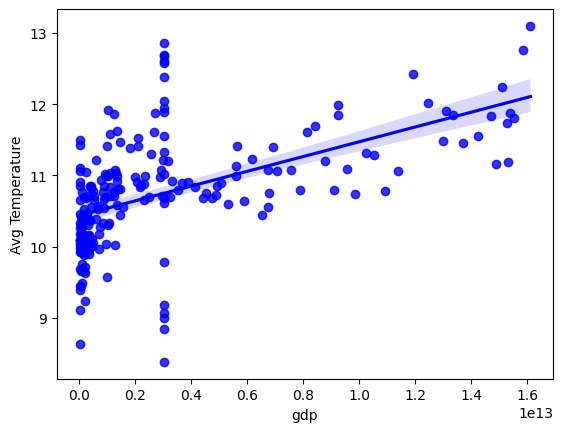

In [24]:
# Scatter plot between GDP and Avg Temperature.
sns.regplot(x = 'gdp', y = 'Avg Temperature', color = "blue", data = predict_temp_df)

In [25]:
y['Avg Temperature'].value_counts()

Avg Temperature
10    114
11     57
9      27
12     11
8       4
13      1
Name: count, dtype: int64

### Splitting the dataset into the Training and Test set

In [26]:
# Create Train and Test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# Create StandardScaler instance.
scaler = StandardScaler()

# Fit StandardScaler.
X_scaler = scaler.fit(X_train)

# Scale data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

<Axes: title={'center': 'CO2 Related Metrics'}, xlabel='year'>

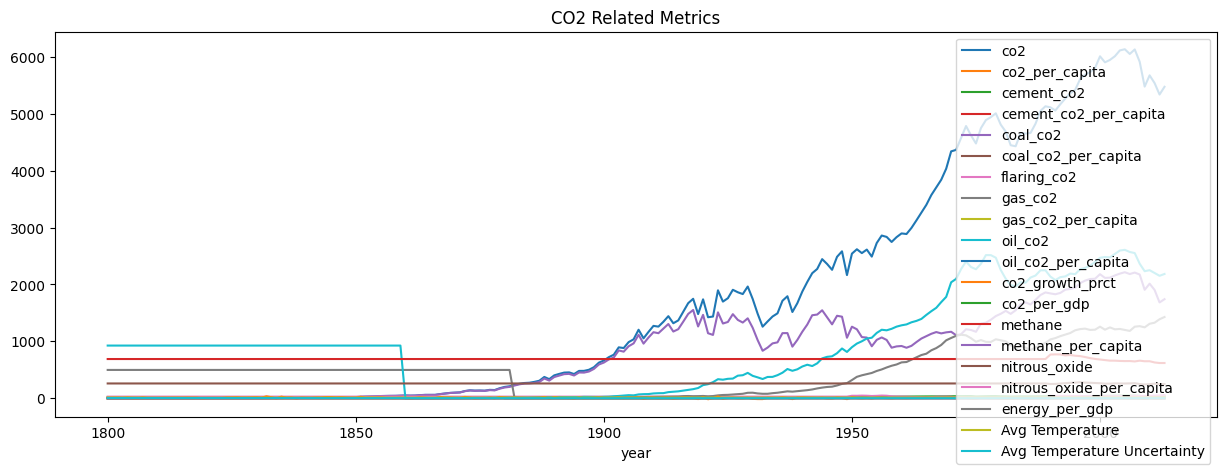

In [27]:
predict_temp_df.plot(x='year', y=['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 
       'energy_per_gdp','Avg Temperature',
       'Avg Temperature Uncertainty'], figsize=(15,5), 
        title='CO2 Related Metrics')

### Standardize data for machine learning

In [28]:
# Define predictor variable columns.
df_x = predict_temp_df[['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp',
       'Avg Temperature Uncertainty']]

In [29]:
# Standardize values for each predictor variable.
predict_temp_df[['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp',
       'Avg Temperature Uncertainty']] = (df_x-df_x.mean())/df_x.std()

predict_temp_df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,-0.878867,-1.211743,0.000000,0.000000,-1.089623,-1.311358,8.757902e-16,1.468735e-16,...,-2.707196e-16,6.741262e-15,-7.545265e-15,0.000000,1.153616e-14,-1.134488,-1.184343e-16,0.000000,12.377868,1.977256
1,United States,1801,-0.878860,-1.211491,0.000000,0.000000,-1.089604,-1.310841,8.757902e-16,1.468735e-16,...,-2.707196e-16,6.741262e-15,-7.545265e-15,0.000000,1.153616e-14,-1.133269,-1.184343e-16,0.000000,12.681863,1.692318
2,United States,1802,-0.878849,-1.211239,0.000000,0.000000,-1.089573,-1.310324,8.757902e-16,1.468735e-16,...,-2.707196e-16,6.741262e-15,-7.545265e-15,0.000000,1.153616e-14,-1.132028,-1.184343e-16,0.000000,12.859703,1.848731
3,United States,1803,-0.878845,-1.211113,0.000000,0.000000,-1.089562,-1.310065,8.757902e-16,1.468735e-16,...,-2.707196e-16,6.741262e-15,-7.545265e-15,0.000000,1.153616e-14,-1.130763,-1.184343e-16,0.000000,12.692603,1.848115
4,United States,1804,-0.878827,-1.210483,0.000000,0.000000,-1.089511,-1.308772,8.757902e-16,1.468735e-16,...,-2.707196e-16,6.741262e-15,-7.545265e-15,0.000000,1.153616e-14,-1.129473,-1.184343e-16,0.000000,12.576432,2.136977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,1.832580,1.036441,0.889524,0.213978,1.581383,0.287207,1.379233e+00,1.934106e+00,...,-8.552590e-01,-2.316873e+00,-2.731211e+00,-5.303071,-4.420442e+00,2.081589,2.871650e+00,-2.744870,11.156327,-0.765031
210,United States,2010,1.930375,1.097298,1.034971,0.308922,1.731859,0.362996,1.659272e+00,2.097119e+00,...,-8.455053e-01,-2.287818e+00,-2.875630e+00,-3.688351,-4.039444e+00,2.110546,2.962929e+00,-2.709322,11.732877,-0.773080
211,United States,2011,1.863250,1.023337,1.095164,0.327911,1.578036,0.257977,2.176826e+00,2.145427e+00,...,-8.820817e-01,-3.571593e+00,-3.614713e+00,-1.163844,-3.346720e+00,2.138097,3.020822e+00,-2.821890,11.811093,-0.753355
212,United States,2012,1.763525,0.924933,1.337998,0.498810,1.270360,0.064753,2.588626e+00,2.302335e+00,...,-9.308502e-01,-4.165746e+00,-4.022484e+00,-3.914291,-4.558987e+00,2.164440,3.103371e+00,-3.067764,12.761842,-0.719815


### Regression analysis

In [30]:
# Create logistic model.
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [31]:
coefficients = model.coef_[0]

# Print coefficients.
print("Coefficients of the Logistic Regression model:", coefficients)

Coefficients of the Logistic Regression model: [-5.96503775e-21 -1.79058666e-21 -1.71782885e-23 -3.85379159e-23
 -1.91402121e-25 -1.28341527e-21 -1.37315455e-23 -8.85995295e-23
 -1.02524950e-21 -4.75139039e-24 -1.32552400e-21 -7.00117283e-24
 -2.39680411e-23 -1.94105017e-24 -2.18574390e-21 -7.75223120e-24
 -8.22958160e-22 -2.90794717e-24 -1.92470023e-16 -1.28135762e-12
 -8.27226052e-24 -3.64306313e-24 -3.17241999e-24]


In [32]:
# Fi Linear Regression Classifier.
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [33]:
# Check model with intercept and coefficients (slope) and print intercept and coefficients.
print('intercept:', linreg.intercept_)
print('slope:', linreg.coef_)

intercept: [218.55372702]
slope: [[-1.06439086e-01 -4.91351852e-02  1.08122392e+01  8.17110626e-02
  -1.58218683e+01  4.81988057e-02 -1.07985311e+01 -1.03983335e-03
   5.68198105e-02 -1.30828140e+01  4.50359908e-02 -9.82263510e+00
  -3.30510053e-03 -2.16990970e-01 -4.04947948e-02  6.50904895e+00
  -1.89738810e-04  1.26254272e+00  7.06374563e-08  1.86324414e-14
   1.01448049e-01 -1.36245961e+00  0.00000000e+00]]


In [34]:
y_pred = linreg.predict(X_test)
y_pred

array([[10.09320739],
       [10.96993974],
       [ 9.93349094],
       [ 9.92082358],
       [ 9.36486787],
       [ 9.75420209],
       [ 9.57478745],
       [10.70657881],
       [10.98048465],
       [ 8.59705103],
       [ 9.82851504],
       [ 9.64297259],
       [ 9.99575763],
       [ 9.56290534],
       [10.57013666],
       [ 9.88004236],
       [10.06131298],
       [10.01565126],
       [10.46508259],
       [ 9.08695427],
       [ 9.75053935],
       [10.97495234],
       [10.0314415 ],
       [ 9.49051172],
       [10.43475047],
       [ 9.76890517],
       [ 9.8174    ],
       [10.76342361],
       [ 9.84550552],
       [ 9.67204976],
       [ 9.97581752],
       [10.34909817],
       [ 9.36956766],
       [ 9.88344399],
       [ 9.35799528],
       [11.6339335 ],
       [10.48055348],
       [10.11020807],
       [10.37425314],
       [ 9.56181536],
       [ 9.7110452 ],
       [10.90951965],
       [10.6574861 ],
       [ 8.94063209],
       [11.24015924],
       [ 9

In [35]:
# Predict accuracy score.
score=r2_score(y_test,y_pred)
print('r2 score is', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is 0.5428924065663119
mean_sqrd_error is== 0.4635346892261371
root_mean_squared error of is== 0.6808338190969491


<Axes: title={'center': 'Average Temperature'}, xlabel='year'>

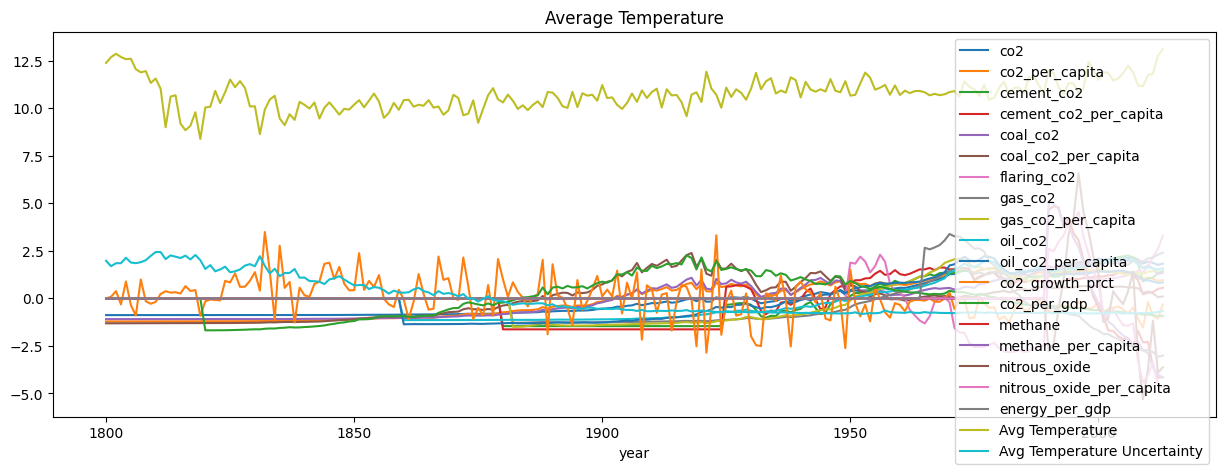

In [36]:
predict_temp_df.plot(x='year', y=['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 
       'energy_per_gdp','Avg Temperature',
       'Avg Temperature Uncertainty'], figsize=(15,5), 
        title='Average Temperature')

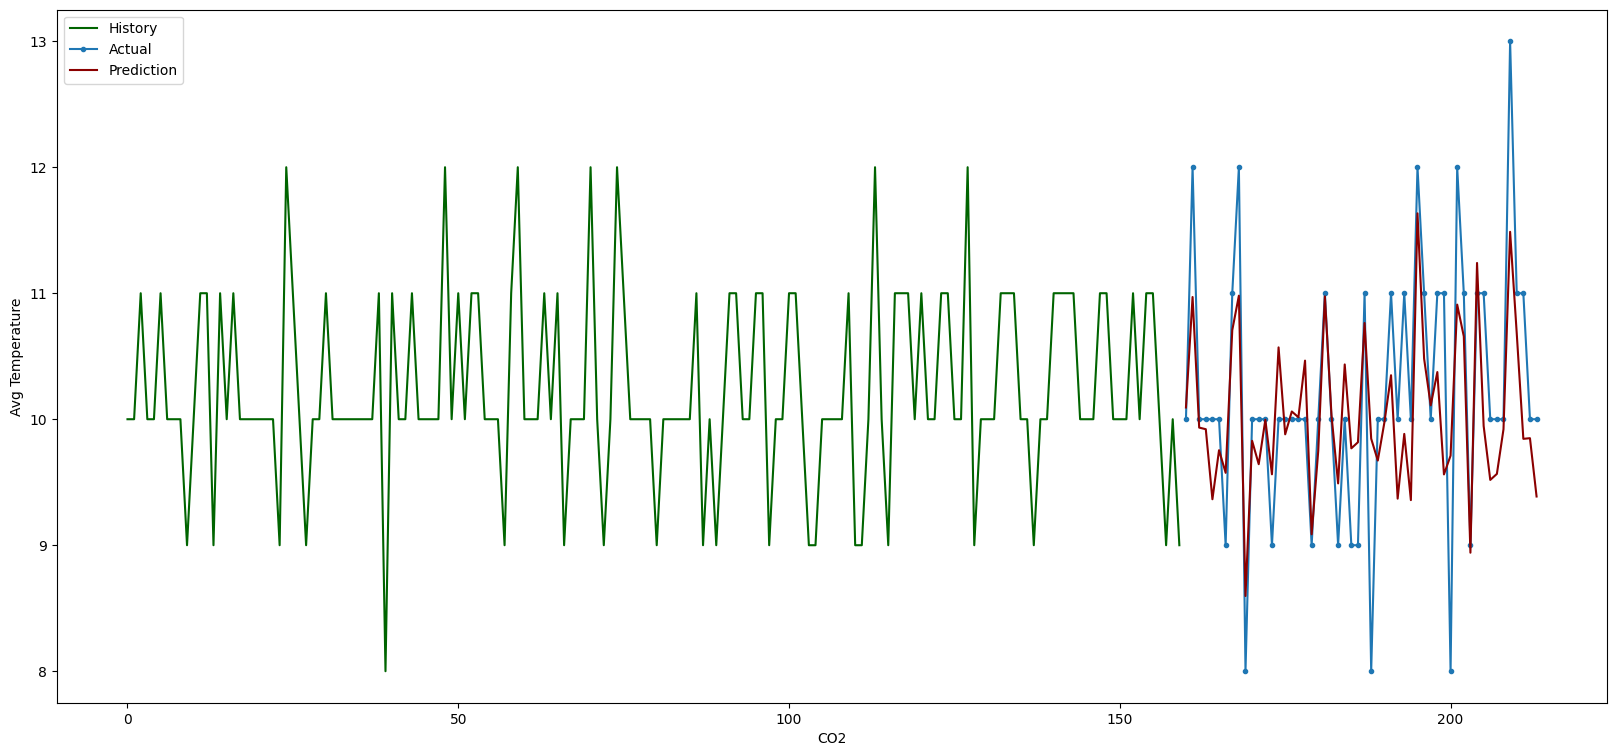

In [37]:
# Plot predictions over the true (actual) values from Time Series.
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 9))
plt.plot(np.arange(0, len(y_train)), y_train, 'darkgreen', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'darkred', label="Prediction")
plt.ylabel('Avg Temperature')
plt.xlabel('CO2')
plt.legend()
plt.show()

In [38]:
# Calculate coefficients
print('Coefficients: \n', linreg.coef_)

# Calculate mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# Calculate mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

# Calculate root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate coefficient of determination (R_squared).
print('Coefficient of Determination:', metrics.r2_score(y_test, y_pred))

Coefficients: 
 [[-1.06439086e-01 -4.91351852e-02  1.08122392e+01  8.17110626e-02
  -1.58218683e+01  4.81988057e-02 -1.07985311e+01 -1.03983335e-03
   5.68198105e-02 -1.30828140e+01  4.50359908e-02 -9.82263510e+00
  -3.30510053e-03 -2.16990970e-01 -4.04947948e-02  6.50904895e+00
  -1.89738810e-04  1.26254272e+00  7.06374563e-08  1.86324414e-14
   1.01448049e-01 -1.36245961e+00  0.00000000e+00]]
Mean Absolute Error: 0.5118899604507232
Mean Squared Error: 0.4635346892261371
Root Mean Squared Error: 0.6808338190969491
Coefficient of Determination: 0.5428924065663119


## Random forest regression

In [39]:
df = pd.read_csv("USA_CO2_Data.csv")
df.head()

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,0.253,0.042,NaN,NaN,0.253,0.042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000,NaN,NaN,12.377868,3.205628
1,United States,1801,0.267,0.044,NaN,NaN,0.267,0.044,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782,NaN,NaN,12.681863,2.895417
2,United States,1802,0.289,0.046,NaN,NaN,0.289,0.046,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723,NaN,NaN,12.859703,3.065703
3,United States,1803,0.297,0.047,NaN,NaN,0.297,0.047,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862,NaN,NaN,12.692603,3.065032
4,United States,1804,0.333,0.052,NaN,NaN,0.333,0.052,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241,NaN,NaN,12.576432,3.379515


In [40]:
# Removing the NaN values by replacing the NaN values with the mean average. 
df['flaring_co2'].fillna(df['flaring_co2'].mean(), inplace = True)
df['cement_co2'].fillna(df['cement_co2'].mean(), inplace = True)
df['cement_co2_per_capita'].fillna(df['cement_co2_per_capita'].mean(), inplace = True)
df['gas_co2'].fillna(predict_temp_df['gas_co2'].mean(), inplace = True)
df['gas_co2_per_capita'].fillna(df['gas_co2_per_capita'].mean(), inplace = True)
df['oil_co2'].fillna(df['oil_co2'].mean(), inplace = True)
df['oil_co2_per_capita'].fillna(df['oil_co2_per_capita'].mean(), inplace = True)
df['co2_per_gdp'].fillna(df['co2_per_gdp'].mean(), inplace = True)
df['methane'].fillna(df['methane'].mean(), inplace = True)
df['methane_per_capita'].fillna(df['methane_per_capita'].mean(), inplace = True)
df['nitrous_oxide'].fillna(df['nitrous_oxide'].mean(), inplace = True)
df['nitrous_oxide_per_capita'].fillna(df['nitrous_oxide_per_capita'].mean(), inplace = True)
df['gdp'].fillna(df['gdp'].mean(), inplace = True)
df['energy_per_gdp'].fillna(df['energy_per_gdp'].mean(), inplace = True)
df['co2_growth_prct'].fillna(df['co2_growth_prct'].mean(), inplace = True)

df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,0.253,0.042,18.398612,0.085731,0.253,0.042,27.881062,1.494132e-16,...,0.718742,688.9625,2.4435,259.413333,0.916625,6000000,3.055051e+12,2.602592,12.377868,3.205628
1,United States,1801,0.267,0.044,18.398612,0.085731,0.267,0.044,27.881062,1.494132e-16,...,0.718742,688.9625,2.4435,259.413333,0.916625,6113782,3.055051e+12,2.602592,12.681863,2.895417
2,United States,1802,0.289,0.046,18.398612,0.085731,0.289,0.046,27.881062,1.494132e-16,...,0.718742,688.9625,2.4435,259.413333,0.916625,6229723,3.055051e+12,2.602592,12.859703,3.065703
3,United States,1803,0.297,0.047,18.398612,0.085731,0.297,0.047,27.881062,1.494132e-16,...,0.718742,688.9625,2.4435,259.413333,0.916625,6347862,3.055051e+12,2.602592,12.692603,3.065032
4,United States,1804,0.333,0.052,18.398612,0.085731,0.333,0.052,27.881062,1.494132e-16,...,0.718742,688.9625,2.4435,259.413333,0.916625,6468241,3.055051e+12,2.602592,12.576432,3.379515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,5478.210,17.885,29.615000,0.097000,1905.943,6.222,39.071000,1.245742e+03,...,0.368000,649.8900,2.1220,241.810000,0.789000,306307565,1.489429e+13,1.676000,11.156327,0.220114
210,United States,2010,5675.786,18.368,31.449000,0.102000,2013.304,6.515,41.343000,1.308832e+03,...,0.372000,650.3800,2.1050,247.170000,0.800000,309011469,1.527062e+13,1.688000,11.732877,0.211351
211,United States,2011,5540.173,17.781,32.208000,0.103000,1903.555,6.109,45.542000,1.327528e+03,...,0.357000,628.7300,2.0180,255.550000,0.820000,311584051,1.550930e+13,1.650000,11.811093,0.232825
212,United States,2012,5338.698,17.000,35.270000,0.112000,1684.037,5.362,48.883000,1.388255e+03,...,0.337000,618.7100,1.9700,246.420000,0.785000,314043885,1.584964e+13,1.567000,12.761842,0.269340


In [41]:
# Define predictor variable columns
df_x = predict_temp_df[['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp',
       'Avg Temperature Uncertainty']]

In [42]:
# Standardize the values for each predictor variable
predict_temp_df[['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp',
       'Avg Temperature Uncertainty']] = (df_x-df_x.mean())/df_x.std()

predict_temp_df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,-0.878867,-1.211743,-3.320293e-17,3.320293e-17,-1.089623,-1.311358,-5.617216e-17,-2.539657e-18,...,-2.375167e-16,-1.166315e-16,-1.596790e-16,7.678178e-16,4.969740e-16,-1.134488,-1.184343e-16,3.050519e-16,12.377868,1.977256
1,United States,1801,-0.878860,-1.211491,-3.320293e-17,3.320293e-17,-1.089604,-1.310841,-5.617216e-17,-2.539657e-18,...,-2.375167e-16,-1.166315e-16,-1.596790e-16,7.678178e-16,4.969740e-16,-1.133269,-1.184343e-16,3.050519e-16,12.681863,1.692318
2,United States,1802,-0.878849,-1.211239,-3.320293e-17,3.320293e-17,-1.089573,-1.310324,-5.617216e-17,-2.539657e-18,...,-2.375167e-16,-1.166315e-16,-1.596790e-16,7.678178e-16,4.969740e-16,-1.132028,-1.184343e-16,3.050519e-16,12.859703,1.848731
3,United States,1803,-0.878845,-1.211113,-3.320293e-17,3.320293e-17,-1.089562,-1.310065,-5.617216e-17,-2.539657e-18,...,-2.375167e-16,-1.166315e-16,-1.596790e-16,7.678178e-16,4.969740e-16,-1.130763,-1.184343e-16,3.050519e-16,12.692603,1.848115
4,United States,1804,-0.878827,-1.210483,-3.320293e-17,3.320293e-17,-1.089511,-1.308772,-5.617216e-17,-2.539657e-18,...,-2.375167e-16,-1.166315e-16,-1.596790e-16,7.678178e-16,4.969740e-16,-1.129473,-1.184343e-16,3.050519e-16,12.576432,2.136977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,1.832580,1.036441,8.895243e-01,2.139782e-01,1.581383,0.287207,1.379233e+00,1.934106e+00,...,-8.552590e-01,-2.316873e+00,-2.731211e+00,-5.303071e+00,-4.420442e+00,2.081589,2.871650e+00,-2.744870e+00,11.156327,-0.765031
210,United States,2010,1.930375,1.097298,1.034971e+00,3.089222e-01,1.731859,0.362996,1.659272e+00,2.097119e+00,...,-8.455053e-01,-2.287818e+00,-2.875630e+00,-3.688351e+00,-4.039444e+00,2.110546,2.962929e+00,-2.709322e+00,11.732877,-0.773080
211,United States,2011,1.863250,1.023337,1.095164e+00,3.279110e-01,1.578036,0.257977,2.176826e+00,2.145427e+00,...,-8.820817e-01,-3.571593e+00,-3.614713e+00,-1.163844e+00,-3.346720e+00,2.138097,3.020822e+00,-2.821890e+00,11.811093,-0.753355
212,United States,2012,1.763525,0.924933,1.337998e+00,4.988101e-01,1.270360,0.064753,2.588626e+00,2.302335e+00,...,-9.308502e-01,-4.165746e+00,-4.022484e+00,-3.914291e+00,-4.558987e+00,2.164440,3.103371e+00,-3.067764e+00,12.761842,-0.719815


In [43]:
# Create features.
X = df.drop(columns = "Avg Temperature")
X = pd.get_dummies(X, columns = ["country"])

# Create target.
y = df['Avg Temperature'].astype('int').to_frame()

In [44]:
# Drop United States.
df = df.drop(columns = ['country'], axis=1)
df

,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,gas_co2_per_capita,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,1800,0.253,0.042,18.398612,0.085731,0.253,0.042,27.881062,1.494132e-16,2.186538,...,0.718742,688.9625,2.4435,259.413333,0.916625,6000000,3.055051e+12,2.602592,12.377868,3.205628
1,1801,0.267,0.044,18.398612,0.085731,0.267,0.044,27.881062,1.494132e-16,2.186538,...,0.718742,688.9625,2.4435,259.413333,0.916625,6113782,3.055051e+12,2.602592,12.681863,2.895417
2,1802,0.289,0.046,18.398612,0.085731,0.289,0.046,27.881062,1.494132e-16,2.186538,...,0.718742,688.9625,2.4435,259.413333,0.916625,6229723,3.055051e+12,2.602592,12.859703,3.065703
3,1803,0.297,0.047,18.398612,0.085731,0.297,0.047,27.881062,1.494132e-16,2.186538,...,0.718742,688.9625,2.4435,259.413333,0.916625,6347862,3.055051e+12,2.602592,12.692603,3.065032
4,1804,0.333,0.052,18.398612,0.085731,0.333,0.052,27.881062,1.494132e-16,2.186538,...,0.718742,688.9625,2.4435,259.413333,0.916625,6468241,3.055051e+12,2.602592,12.576432,3.379515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2009,5478.210,17.885,29.615000,0.097000,1905.943,6.222,39.071000,1.245742e+03,4.067000,...,0.368000,649.8900,2.1220,241.810000,0.789000,306307565,1.489429e+13,1.676000,11.156327,0.220114
210,2010,5675.786,18.368,31.449000,0.102000,2013.304,6.515,41.343000,1.308832e+03,4.236000,...,0.372000,650.3800,2.1050,247.170000,0.800000,309011469,1.527062e+13,1.688000,11.732877,0.211351
211,2011,5540.173,17.781,32.208000,0.103000,1903.555,6.109,45.542000,1.327528e+03,4.261000,...,0.357000,628.7300,2.0180,255.550000,0.820000,311584051,1.550930e+13,1.650000,11.811093,0.232825
212,2012,5338.698,17.000,35.270000,0.112000,1684.037,5.362,48.883000,1.388255e+03,4.421000,...,0.337000,618.7100,1.9700,246.420000,0.785000,314043885,1.584964e+13,1.567000,12.761842,0.269340


In [45]:
df = df.values.reshape(-1,4922)

In [46]:
# Create new test/train split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [47]:
len(X_test)

54

In [48]:
# Create and fit Random Forest model.
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# Run model.
model.score(X_test, y_test)

0.6481481481481481

In [50]:
# Generate model prediction.
y_predicted = model.predict(X_test)

In [51]:
# Generate confusion matrix from model.
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 0,  1,  1,  0,  0],
       [ 0,  3,  2,  1,  0],
       [ 0,  4, 22,  5,  1],
       [ 0,  0,  3,  8,  1],
       [ 0,  0,  0,  0,  2]])

Text(95.72222222222221, 0.5, 'Actual')

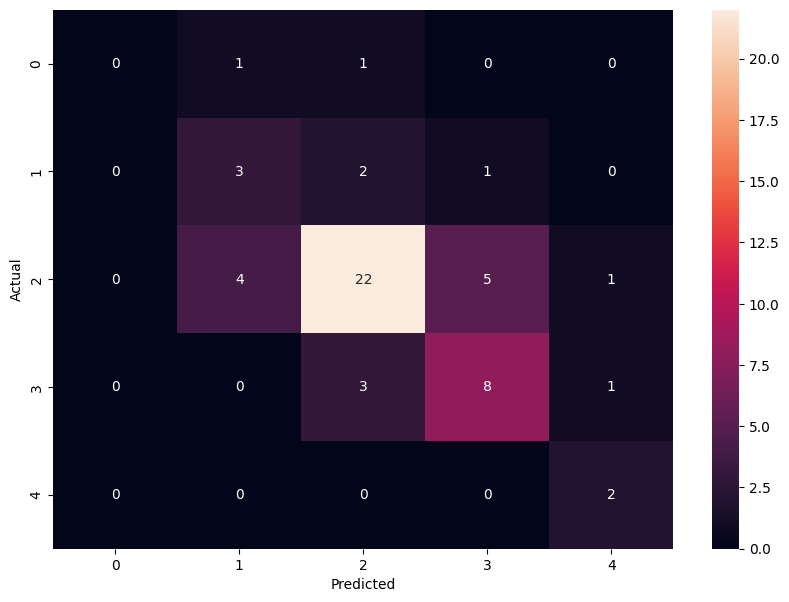

In [52]:
# Visualizing confusion matrix.
%matplotlib inline
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')